In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud #building plot
import re #regular expression
import nltk #natural language toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
df = pd.read_csv('movies.csv')

In [26]:
df.shape

(4803, 20)

In [27]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [29]:
req_col = ['genres', 'keywords', 'overview', 'title']
df = df[req_col]
import ast
def extract_names(text):
    try:
        data = ast.literal_eval(text)
        return " ".join([item['name'] for item in data])
    except:
        return ""
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)
df.head(3)

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,A cryptic message from Bond’s past sends him o...,Spectre


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4803 non-null   object
 1   keywords  4803 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [31]:
df = df.dropna().reset_index(drop=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4800 non-null   object
 1   keywords  4800 non-null   object
 2   overview  4800 non-null   object
 3   title     4800 non-null   object
dtypes: object(4)
memory usage: 150.1+ KB


In [33]:
df['combined'] = df['genres'] + ' ' + df['keywords'] + ' ' + df['overview']
df.head()

,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Action Adventure Science Fiction based on nove...


In [34]:
data = df[['title', 'combined']]
data.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...


In [35]:
from tkinter.constants import W
#wordcloud for movie content
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

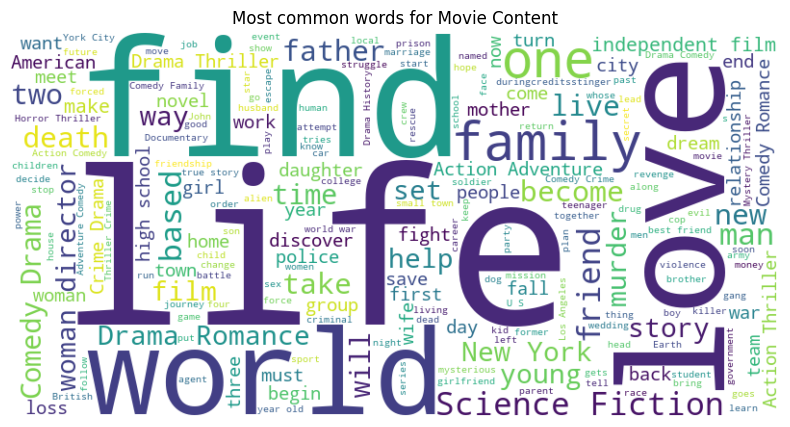

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words for Movie Content')
plt.show()

In [37]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
def preprocess_text(text):
  # remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', "", text)
  # convert to lowercase
  text = text.lower()
  # tokenise and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [40]:
data['cleaned_text'] = df['combined'].apply(preprocess_text)
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2932\2242391156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based novel secret ...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,action crime drama thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...,action adventure science fiction based novel m...


In [41]:
# Vectorization with TF-IDF
tfidf_vectoriser = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectoriser.fit_transform(data['cleaned_text'])

In [42]:
# compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.02391095, 0.00937661, ..., 0.01014823, 0.00467046,
        0.        ],
       [0.02391095, 1.        , 0.02368238, ..., 0.02216394, 0.        ,
        0.        ],
       [0.00937661, 0.02368238, 1.        , ..., 0.01435292, 0.        ,
        0.        ],
       ...,
       [0.01014823, 0.02216394, 0.01435292, ..., 1.        , 0.01740847,
        0.03024128],
       [0.00467046, 0.        , 0.        , ..., 0.01740847, 1.        ,
        0.00529788],
       [0.        , 0.        , 0.        , ..., 0.03024128, 0.00529788,
        1.        ]], shape=(4800, 4800))

In [43]:
def recommend_Movies(movie_title, cosine_sim=cosine_sim, df=data, top_n=10):
  # get index of movie
  idx = df[df['title'].str.lower() == movie_title.lower()].index
  if len(idx) == 0:
    return 'Movie not found in the dataset!'
  idx = idx[0]
  # get similarity scores
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]
  #get movie indices
  movie_indices = [i[0] for i in sim_scores]
  # return top n similar moviews
  return df['title'].iloc[movie_indices]

In [44]:
row_index = df[df['title'] == 'The Dark Knight Rises'].index
print(row_index)

Index([3], dtype='int64')


In [45]:
# movie_name = data['title'][1100]
movie_name = 'The Wolf of Wall Street'
movie_name

'The Wolf of Wall Street'

In [46]:
print(f'Recommended movies for {movie_name}:')
print(recommend_Movies(movie_name))

Recommended movies for The Wolf of Wall Street:
1704                           The Big Short
2448                             Wall Street
588          Wall Street: Money Never Sleeps
4095                              Inside Job
3861                             Margin Call
2110              Madea's Witness Protection
3256                         American Psycho
2007    Harley Davidson and the Marlboro Man
2191                Capitalism: A Love Story
1038                         The Infiltrator
Name: title, dtype: object
